<a href="https://colab.research.google.com/github/selfor21/NN-FROM-SCRATCH-LOW-LEVEL/blob/main/C_06_Intro_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
pip install nnfs

In [9]:
import numpy as np
import math
import nnfs
nnfs.init()

In [10]:
import matplotlib.pyplot as plt
from nnfs.datasets import spiral_data

In [11]:
class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
      self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
      self.biases = np.zeros((1, n_neurons))

    def forward(self, inputs):
      self.output = np.dot(inputs, self.weights) + self.biases


In [12]:
class Activation_ReLU:
  # Forward Pass
  def forward(self, inputs):
    self.output = np.maximum(0,inputs)


In [13]:
# Softmax activation
class Activation_Softmax:
# Forward pass
  def forward(self, inputs):
    # Get unnormalized probabilities
    exp_values = np.exp(inputs - np.max(inputs, axis=1, keepdims=True))
  # Normalize them for each sample
    probabilities = exp_values / np.sum(exp_values, axis=1, keepdims=True)
    self.output = probabilities

In [14]:
# Common loss class
# Calculates the data and regularization losses given model output and ground truth values

class Loss:
  def calculate(self, output, y):
    sample_losses = self.forward(output, y)
    data_loss = np.mean(sample_losses)
    return data_loss

In [15]:
# Cross-entropy loss
class Loss_CategoricalCrossentropy(Loss):
  # Forward pass
  def forward(self, y_pred, y_true):
  # Number of samples in a batch
    samples = len(y_pred)
  # Clip data to prevent division by 0
  # Clip both sides to not drag mean towards any value
    y_pred_clipped = np.clip(y_pred, 1e-7, 1 - 1e-7)
  # Probabilities for target values - only if categorical labels
    if len(y_true.shape) == 1:
      correct_confidences = y_pred_clipped[ range(samples), y_true ]
  # Mask values - only for one-hot encoded labels
    elif len(y_true.shape) == 2:
      correct_confidences = np.sum( y_pred_clipped*y_true, axis=1 )
  # Losses
    negative_log_likelihoods = -np.log(correct_confidences)
    return negative_log_likelihoods

## Random Optimization

In [16]:
from nnfs.datasets import vertical_data
nnfs.init()

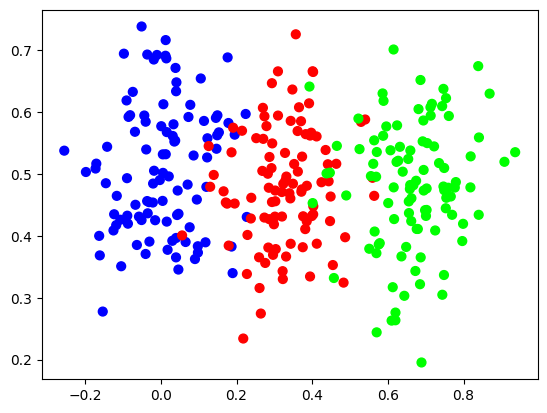

In [17]:
X, y = vertical_data(samples=100, classes=3)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap='brg')
plt.show()

In [18]:
# Create model
dense1 = Layer_Dense(2, 3) # first dense layer, 2 inputs
activation1 = Activation_ReLU()
dense2 = Layer_Dense(3, 3) # second dense layer, 3 inputs, 3 outputs
activation2 = Activation_Softmax()
# Create loss function
loss_function = Loss_CategoricalCrossentropy()

In [19]:
# Helper variables
lowest_loss = 9999999 # some initial value
best_dense1_weights = dense1.weights.copy()
best_dense1_biases = dense1.biases.copy()
best_dense2_weights = dense2.weights.copy()
best_dense2_biases = dense2.biases.copy()

In [21]:
for iteration in range(10000):
  # Generate a new set of weights for iteration
  dense1.weights = 0.05 * np.random.randn(2, 3)
  dense1.biases = 0.05 * np.random.randn(1, 3)
  dense2.weights = 0.05 * np.random.randn(3, 3)
  dense2.biases = 0.05 * np.random.randn(1, 3)

  # Perform a forward pass of the training data through this layer
  dense1.forward(X)
  activation1.forward(dense1.output)
  dense2.forward(activation1.output)
  activation2.forward(dense2.output)

  # Perform a forward pass through activation function
  # it takes the output of second dense layer here and returns loss
  loss = loss_function.calculate(activation2.output, y)

  # Calculate accuracy from output of activation2 and targets
  # calculate values along first axis
  predictions = np.argmax(activation2.output, axis=1)
  accuracy = np.mean(predictions == y)

  # If loss is smaller - print and save weights and biases aside
  if loss < lowest_loss:
    print('New set of weights found, iteration:', iteration,
    'loss:', loss, 'acc:', accuracy)
  best_dense1_weights = dense1.weights.copy()
  best_dense1_biases = dense1.biases.copy()
  best_dense2_weights = dense2.weights.copy()
  best_dense2_biases = dense2.biases.copy()
  lowest_loss = loss

New set of weights found, iteration: 0 loss: 1.0986564 acc: 0.3333333333333333
New set of weights found, iteration: 3 loss: 1.098138 acc: 0.3333333333333333
New set of weights found, iteration: 5 loss: 1.0991402 acc: 0.3333333333333333
New set of weights found, iteration: 6 loss: 1.0990964 acc: 0.3333333333333333
New set of weights found, iteration: 7 loss: 1.0988289 acc: 0.3333333333333333
New set of weights found, iteration: 9 loss: 1.0985737 acc: 0.3333333333333333
New set of weights found, iteration: 11 loss: 1.0988998 acc: 0.3333333333333333
New set of weights found, iteration: 14 loss: 1.0997292 acc: 0.3333333333333333
New set of weights found, iteration: 15 loss: 1.0990521 acc: 0.3333333333333333
New set of weights found, iteration: 17 loss: 1.0995829 acc: 0.3333333333333333
New set of weights found, iteration: 18 loss: 1.0994319 acc: 0.3333333333333333
New set of weights found, iteration: 21 loss: 1.0992074 acc: 0.3333333333333333
New set of weights found, iteration: 22 loss: 1

## Optimization using best result for the next iteration

In [22]:
# Create model
dense1 = Layer_Dense(2, 3) # first dense layer, 2 inputs
activation1 = Activation_ReLU()
dense2 = Layer_Dense(3, 3) # second dense layer, 3 inputs, 3 outputs
activation2 = Activation_Softmax()

# Create loss function
loss_function = Loss_CategoricalCrossentropy()

# Helper variables
lowest_loss = 9999999 # some initial value
best_dense1_weights = dense1.weights.copy()
best_dense1_biases = dense1.biases.copy()
best_dense2_weights = dense2.weights.copy()
best_dense2_biases = dense2.biases.copy()


In [23]:
for iteration in range(10000):
  # Update weights with some small random values
  dense1.weights += 0.05 * np.random.randn(2, 3)
  dense1.biases += 0.05 * np.random.randn(1, 3)
  dense2.weights += 0.05 * np.random.randn(3, 3)
  dense2.biases += 0.05 * np.random.randn(1, 3)

  # Perform a forward pass of our training data through this layer
  dense1.forward(X)
  activation1.forward(dense1.output)
  dense2.forward(activation1.output)
  activation2.forward(dense2.output)

  # Perform a forward pass through activation function
  # it takes the output of second dense layer here and returns loss
  loss = loss_function.calculate(activation2.output, y)

  # Calculate accuracy from output of activation2 and targets
  # calculate values along first axis
  predictions = np.argmax(activation2.output, axis=1)
  accuracy = np.mean(predictions == y)

  # If loss is smaller - print and save weights and biases aside
  if loss < lowest_loss:
    print('New set of weights found, iteration:', iteration,
    'loss:', loss, 'acc:', accuracy)
    best_dense1_weights = dense1.weights.copy()
    best_dense1_biases = dense1.biases.copy()
    best_dense2_weights = dense2.weights.copy()
    best_dense2_biases = dense2.biases.copy()
    lowest_loss = loss

  # Revert weights and biases
  else:
    dense1.weights = best_dense1_weights.copy()
    dense1.biases = best_dense1_biases.copy()
    dense2.weights = best_dense2_weights.copy()
    dense2.biases = best_dense2_biases.copy()

New set of weights found, iteration: 0 loss: 1.099457 acc: 0.3333333333333333
New set of weights found, iteration: 3 loss: 1.0976219 acc: 0.3333333333333333
New set of weights found, iteration: 4 loss: 1.0967989 acc: 0.3333333333333333
New set of weights found, iteration: 6 loss: 1.0936456 acc: 0.65
New set of weights found, iteration: 11 loss: 1.089228 acc: 0.3333333333333333
New set of weights found, iteration: 13 loss: 1.0857452 acc: 0.3333333333333333
New set of weights found, iteration: 22 loss: 1.0826465 acc: 0.3333333333333333
New set of weights found, iteration: 26 loss: 1.0765401 acc: 0.3333333333333333
New set of weights found, iteration: 30 loss: 1.0692414 acc: 0.6433333333333333
New set of weights found, iteration: 31 loss: 1.0649691 acc: 0.3333333333333333
New set of weights found, iteration: 36 loss: 1.0625923 acc: 0.34
New set of weights found, iteration: 37 loss: 1.0572853 acc: 0.36
New set of weights found, iteration: 38 loss: 1.0536734 acc: 0.36666666666666664
New set